# Example Notebook for BHPTNRSur2dq1e3

This notebook shows how to use the BHPTNRSur2dq1e3 model. This model was trained on point-particle black hole perturbation theory (BHPT) waveforms and calibrated to NR in the comparable mass ratio regime. 

For more information please see [here](https://bhptoolkit.org/BHPTNRSurrogate/).


# Lesson 1: Setup
 
1. You should now have the programs git and Jupyter as well as the Python packages scipy and h5py
2. clone the BHPTSurrogate repo

```shell
>>> git clone https://github.com/BlackHolePerturbationToolkit/BHPTNRSurrogate.git
```

3. Download the h5 file using the following public link and move it to ```BHPTNRSurrogate/data/```

```
https://www.dropbox.com/scl/fo/hyli37hr8c8wn8iq3p85z/AExZRxZrY6HX5756IdAVeGU?rlkey=n06hodoapvlrx0b6lxfrfbst6
```

Alternatively, the code will automatically do it for you. (Update later)

In [4]:
!wget -O ../../data/BHPTNRSur2dq1e3.h5 https://www.dropbox.com/scl/fo/hyli37hr8c8wn8iq3p85z/AExZRxZrY6HX5756IdAVeGU?rlkey=n06hodoapvlrx0b6lxfrfbst6

--2024-05-15 16:49:19--  https://www.dropbox.com/scl/fo/hyli37hr8c8wn8iq3p85z/AExZRxZrY6HX5756IdAVeGU?rlkey=n06hodoapvlrx0b6lxfrfbst6
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc26f428153a1ef7d5f854d99c40.dl.dropboxusercontent.com/zip_download_get/B2XEwa9BEuIlZQTghD93FrLQM_6GpWPntwzWvWuuzR8ng5Qp9sbQmE6QtHPS_mlM1ll8gL9ynk_F57LGk-rI8nnmxdQFo_YVG5MDRTk_Fw2amg# [following]
--2024-05-15 16:49:19--  https://uc26f428153a1ef7d5f854d99c40.dl.dropboxusercontent.com/zip_download_get/B2XEwa9BEuIlZQTghD93FrLQM_6GpWPntwzWvWuuzR8ng5Qp9sbQmE6QtHPS_mlM1ll8gL9ynk_F57LGk-rI8nnmxdQFo_YVG5MDRTk_Fw2amg
Resolving uc26f428153a1ef7d5f854d99c40.dl.dropboxusercontent.com (uc26f428153a1ef7d5f854d99c40.dl.dropboxusercontent.com)... 162.125.4.15, 2620:100:6019:15::a27d:40f
Connecting to uc26f428153a1ef7d5f854d99c40.dl.dropbo

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt

# provide the path to the BHPTNRSurrogate directory
#PATH_TO_BHPTNRSur = "/work/pi_gkhanna_uri_edu/riteshbachhar_uri_edu/Research/Surrogate/BHPTNRSurrogate"
PATH_TO_BHPTNRSur = "/home/balzani57/Repo/GitRepos/Codes/BHPTNRSurrogate-katie/BHPTNRSurrogate/"
sys.path.append(PATH_TO_BHPTNRSur+"/surrogates")

import BHPTNRSur2dq1e3 as bhptsur

/home/balzani57/pool/anaconda3/envs/py311-gw-5-2024/lib/python3.11/site-packages/gwtools/const.py:52: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal


lal.MSUN_SI != Msun
SURROGATE LOADED


In [2]:
# print out the documentation
help(bhptsur.generate_surrogate)

Help on function generate_surrogate in module BHPTNRSur2dq1e3:

generate_surrogate(q, spin1=0.0, spin2=None, ecc=None, ano=None, modes=None, M_tot=None, dist_mpc=None, orb_phase=None, inclination=None, neg_modes=False, mode_sum=False, lmax=4, calibrated=True)
    ## -------------------------------------------------------------------------- ##
    ## general overview
    ## -------------------------------------------------------------------------- ##
    
    Description : wrapper to generate BHPT surrogate waveforms
    
    Input
    =====
    q: mass ratio (with q >=1)
    
    chi1: dimensionless spin of the primary black hole where -1 <= chi1 <= 1
          Default: None
    
    chi2: dimensionless spin of the secondary black hole where -1 <= chi2 <= 1
          Default: None
          Not Implemented in any model so far
    
    ecc: eccentricity / Default: None
         Not Implemented in any model so far
    
    ano: mean anomaly / Default: None
         Not Implemented in any

# Lesson 2: Calling the model

Here we showcase a few different ways of calling the model

### 1. Generate uncalibrated waveforms (only 0PA effect) in geometric units

dict_keys([(2, 2), (2, 1), (3, 1), (3, 2), (3, 3), (4, 2), (4, 3), (4, 4)])


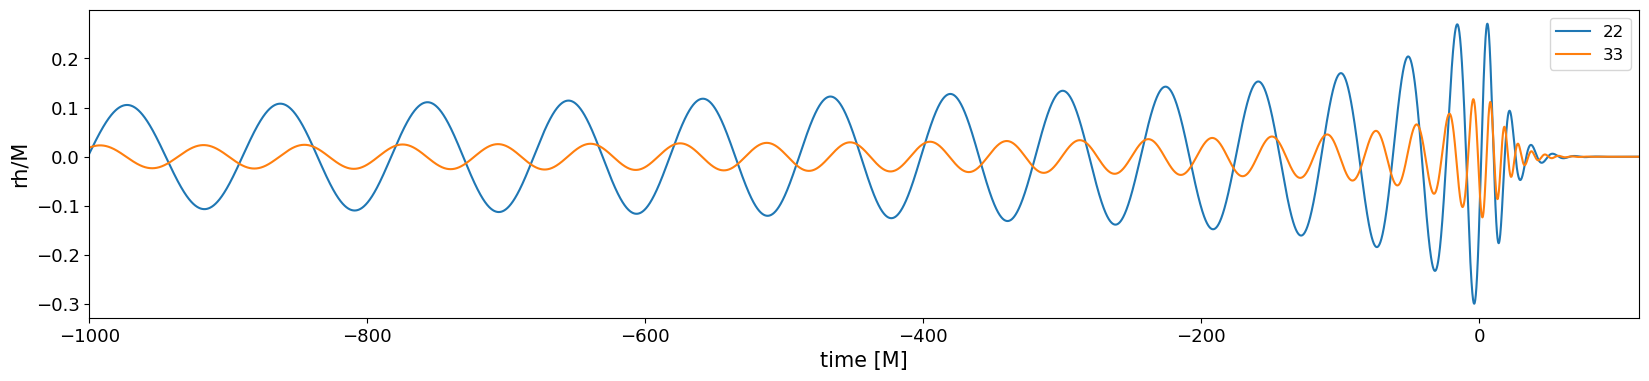

In [3]:
tsur, hsur = bhptsur.generate_surrogate(q=5.0, spin1=0.2, calibrated=False)

print(hsur.keys())

plt.figure(figsize=(20,4))
plt.plot(tsur, np.real(hsur[(2,2)]), '-', label='22')
plt.plot(tsur, np.real(hsur[(3,3)]), '-', label='33')
plt.xlim(-1000,115)
plt.xlabel('time [M]', fontsize=15)
plt.ylabel('rh/M', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize=12)
plt.show()

### 2. Generate NR-calibrated waveforms in geometric units

dict_keys([(2, 2), (2, 1), (3, 1), (3, 2), (3, 3), (4, 2), (4, 3), (4, 4)])


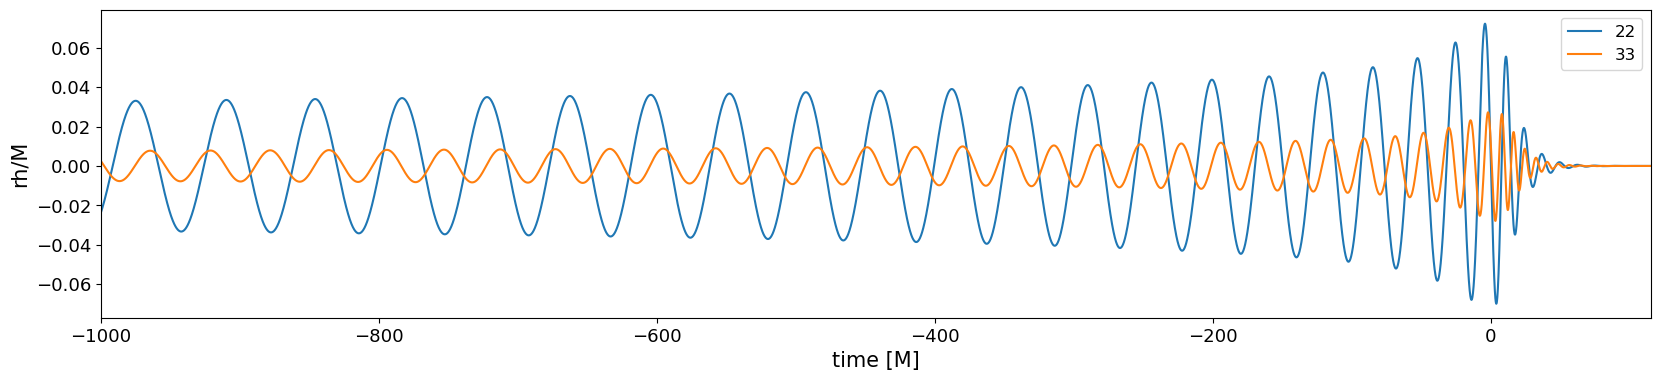

In [4]:
tsur, hsur = bhptsur.generate_surrogate(q=20, spin1=0.5)

print(hsur.keys())

plt.figure(figsize=(20,4))
plt.plot(tsur, np.real(hsur[(2,2)]), '-', label='22')
plt.plot(tsur, np.real(hsur[(3,3)]), '-', label='33')
plt.xlim(-1000,115)
plt.xlabel('time [M]', fontsize=15)
plt.ylabel('rh/M', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize=12)
plt.show()

dict_keys([(2, 2), (2, 1), (3, 1), (3, 2), (3, 3), (4, 2), (4, 3), (4, 4)])


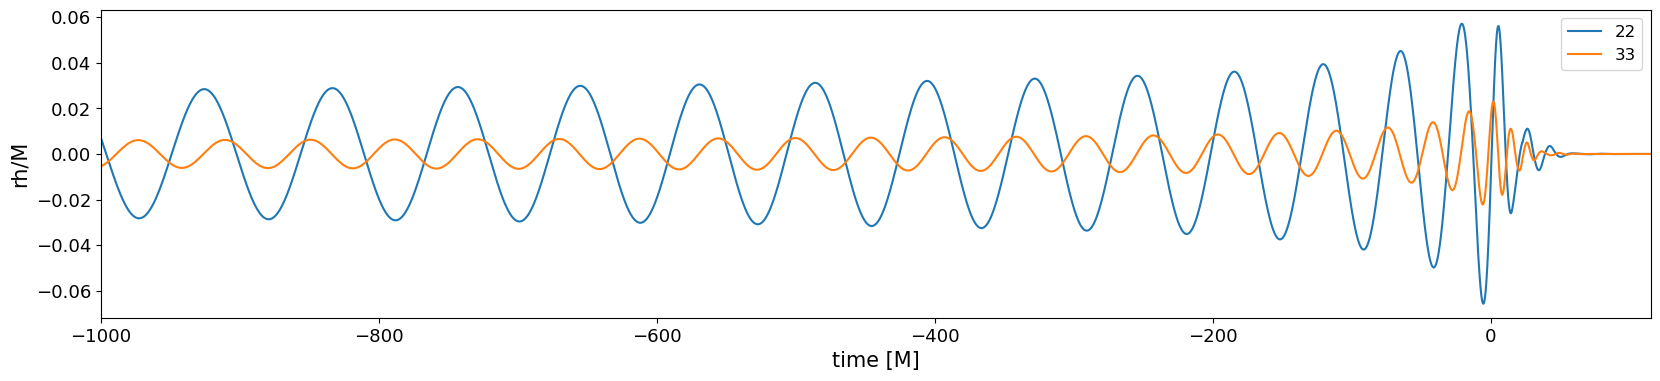

In [5]:
tsur, hsur = bhptsur.generate_surrogate(q=20, spin1=-0.5)

print(hsur.keys())

plt.figure(figsize=(20,4))
plt.plot(tsur, np.real(hsur[(2,2)]), '-', label='22')
plt.plot(tsur, np.real(hsur[(3,3)]), '-', label='33')
plt.xlim(-1000,115)
plt.xlabel('time [M]', fontsize=15)
plt.ylabel('rh/M', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize=12)
plt.show()

### 3. Generate (NR calibrated) waveform modes in Physical (SI) units

dict_keys([(2, 2), (2, 1), (3, 1), (3, 2), (3, 3), (4, 2), (4, 3), (4, 4)])


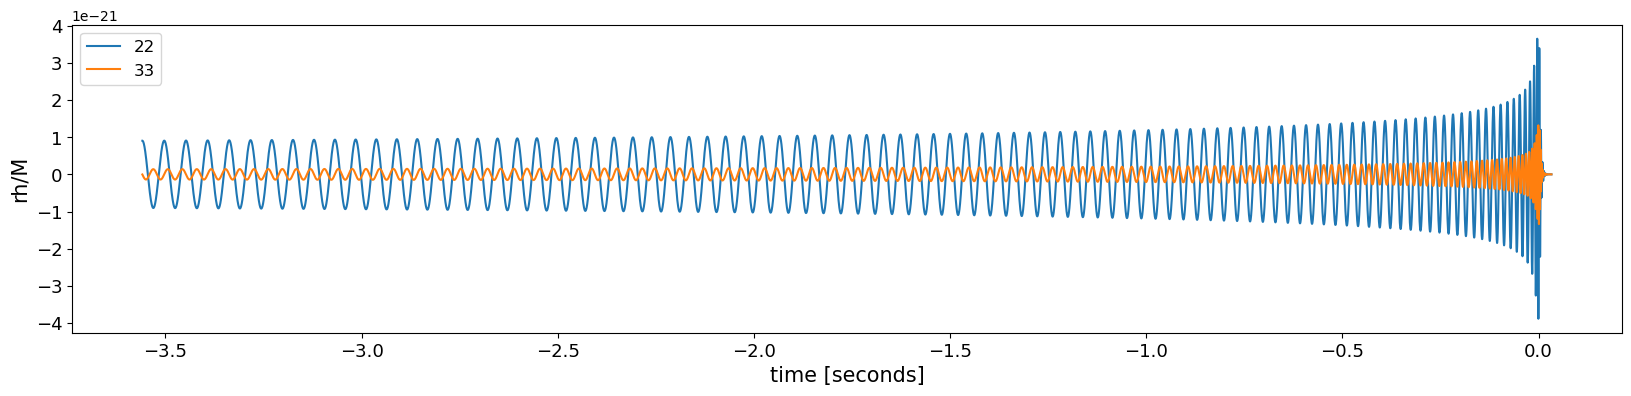

In [6]:
tsur, hsur = bhptsur.generate_surrogate(q=10, spin1=0.3, M_tot=60, dist_mpc=100)

print(hsur.keys())

plt.figure(figsize=(20,4))
plt.plot(tsur, np.real(hsur[(2,2)]), '-', label='22')
plt.plot(tsur, np.real(hsur[(3,3)]), '-', label='33')
plt.xlabel('time [seconds]', fontsize=15)
plt.ylabel('rh/M', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize=12)
plt.show()

### 4. Generate (NR calibrated) waveform modes in Physical (SI) units evaluated at point in the sky

dict_keys([(2, 2), (2, 1), (3, 1), (3, 2), (3, 3), (4, 2), (4, 3), (4, 4)])


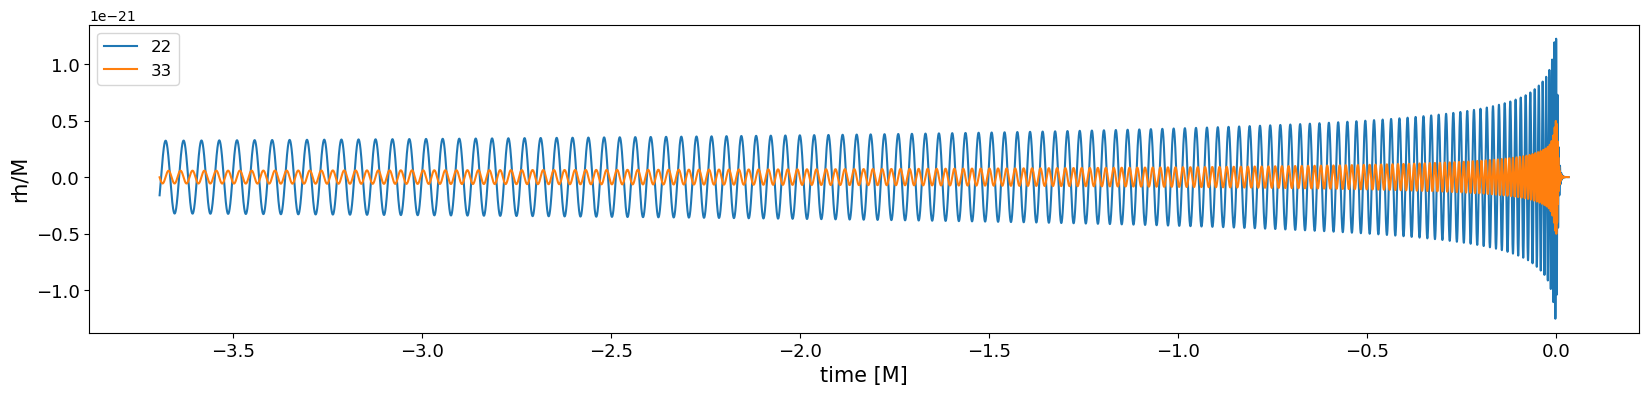

In [7]:
tsur, hsur = bhptsur.generate_surrogate(q=15, spin1=0.7, M_tot=60, dist_mpc=100, orb_phase=np.pi/3, inclination=np.pi/4)

print(hsur.keys())

plt.figure(figsize=(20,4))
plt.plot(tsur, np.real(hsur[(2,2)]), '-', label='22')
plt.plot(tsur, np.real(hsur[(3,3)]), '-', label='33')
plt.xlabel('time [M]', fontsize=15)
plt.ylabel('rh/M', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize=12)
plt.show()

#### 4.1. Check for phase=0, inclination=0, 33 mode is zero

dict_keys([(2, 2), (2, 1), (3, 1), (3, 2), (3, 3), (4, 2), (4, 3), (4, 4)])


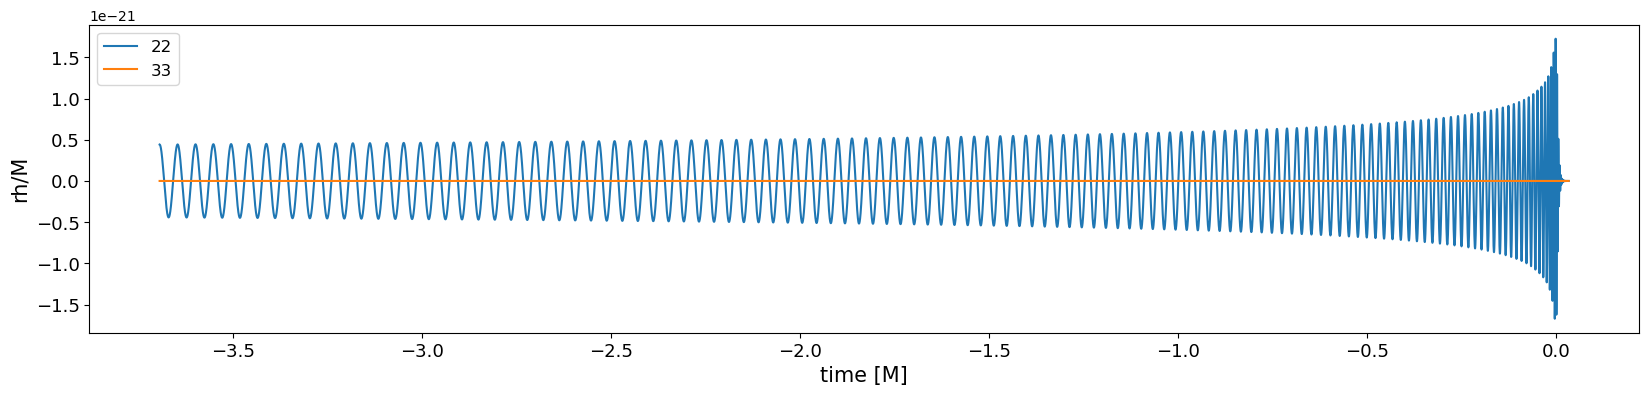

In [8]:
tsur, hsur = bhptsur.generate_surrogate(q=15, spin1=0.7, M_tot=60, dist_mpc=100, orb_phase=0.0, inclination=0.0)

print(hsur.keys())

plt.figure(figsize=(20,4))
plt.plot(tsur, np.real(hsur[(2,2)]), '-', label='22')
plt.plot(tsur, np.real(hsur[(3,3)]), '-', label='33')
plt.xlabel('time [M]', fontsize=15)
plt.ylabel('rh/M', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize=12)
plt.show()

### 5. Generate (NR calibrated) waveform in Physical (SI) units on a sphere for a given set of modes

dict_keys([(2, 2), (2, 1), (3, 1), (3, 2), (3, 3), (4, 2), (4, 3), (4, 4)])


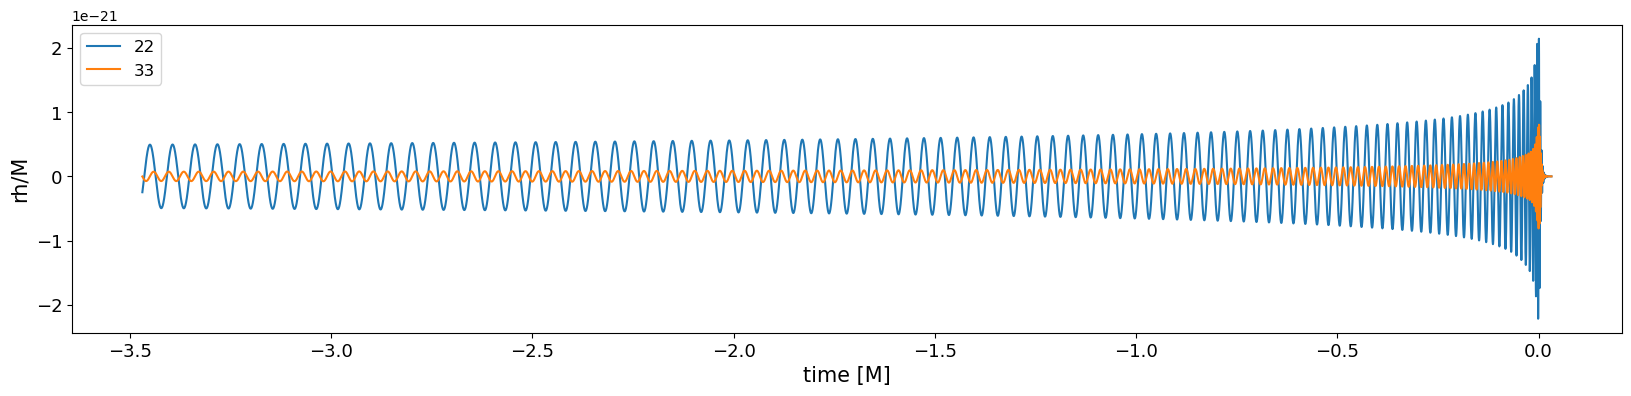

In [9]:
# Note : (2,2) mode should always be in the mode_list; otherwise it will throw errors
modes = [(2,2),(3,3),(4,4),(5,5)]

tsur, hsur = bhptsur.generate_surrogate(q=8, spin1=0.7, M_tot=60, dist_mpc=100, orb_phase=np.pi/3, inclination=np.pi/4)

print(hsur.keys())

plt.figure(figsize=(20,4))
plt.plot(tsur, np.real(hsur[(2,2)]), '-', label='22')
plt.plot(tsur, np.real(hsur[(3,3)]), '-', label='33')
plt.xlabel('time [M]', fontsize=15)
plt.ylabel('rh/M', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize=12)
plt.show()

dict_keys([(2, 2), (2, 1), (3, 1), (3, 2), (3, 3), (4, 2), (4, 3), (4, 4)])


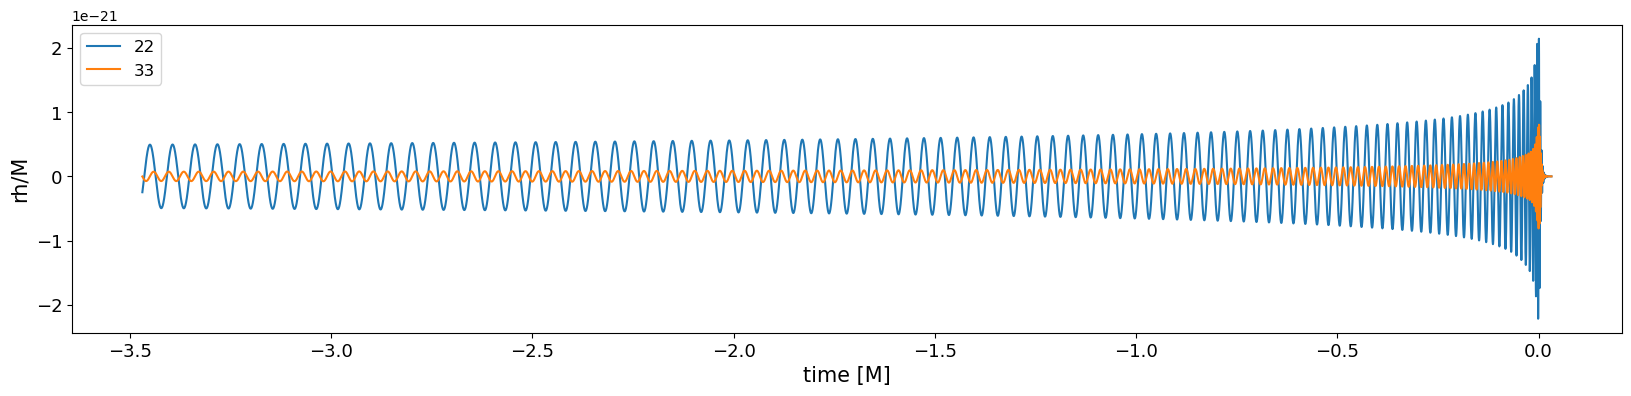

In [10]:
# Note : (2,2) mode should always be in the mode_list; otherwise it will throw errors
modes = [(2,2),(3,3),(4,4),(5,5)]

tsur, hsur = bhptsur.generate_surrogate(q=8, spin1=0.7, M_tot=60, dist_mpc=100, orb_phase=np.pi/3, inclination=np.pi/4)

print(hsur.keys())

plt.figure(figsize=(20,4))
plt.plot(tsur, np.real(hsur[(2,2)]), '-', label='22')
plt.plot(tsur, np.real(hsur[(3,3)]), '-', label='33')
plt.xlabel('time [M]', fontsize=15)
plt.ylabel('rh/M', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize=12)
plt.show()

### 6. Generate (NR calibrated) waveform in Physical (SI) units on a sphere for possible modes upto l=3

dict_keys([(2, 2), (2, 1), (3, 1), (3, 2), (3, 3)])


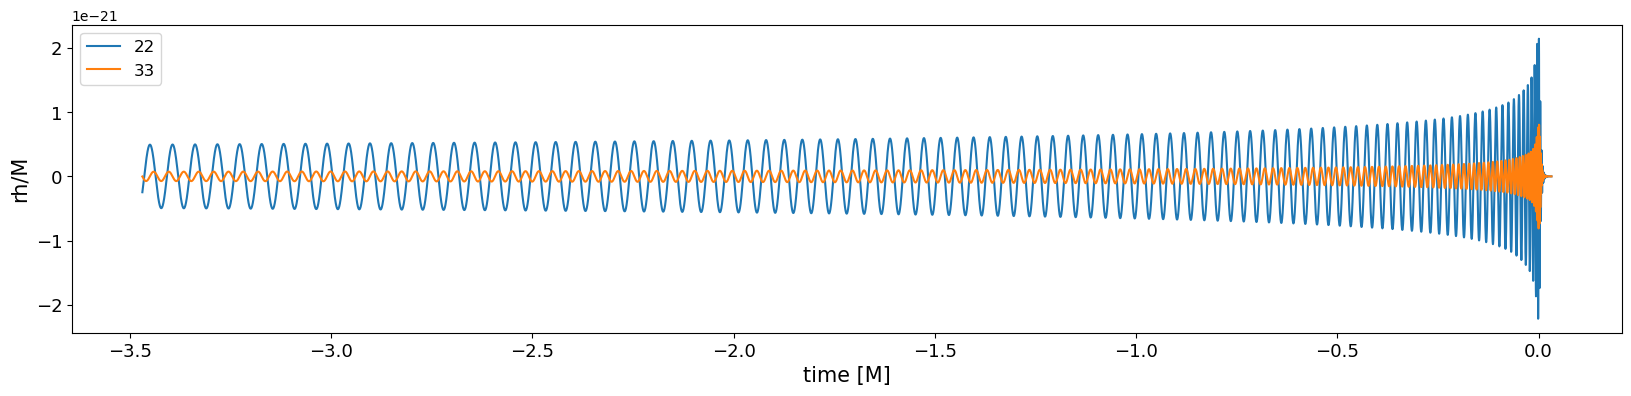

In [11]:
lmax = 3 # Note default value of lmax is 5; because we have NR calibrated modes up to l=5
tsur, hsur = bhptsur.generate_surrogate(q=8, spin1=0.7, M_tot=60, dist_mpc=100, orb_phase=np.pi/3, inclination=np.pi/4, lmax=3)

print(hsur.keys())

plt.figure(figsize=(20,4))
plt.plot(tsur, np.real(hsur[(2,2)]), '-', label='22')
plt.plot(tsur, np.real(hsur[(3,3)]), '-', label='33')
plt.xlabel('time [M]', fontsize=15)
plt.ylabel('rh/M', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize=12)
plt.show()

### 7. Generate mode-summed (NR calibrated) waveform in Physical (SI) units on a sphere for possible modes upto l=3

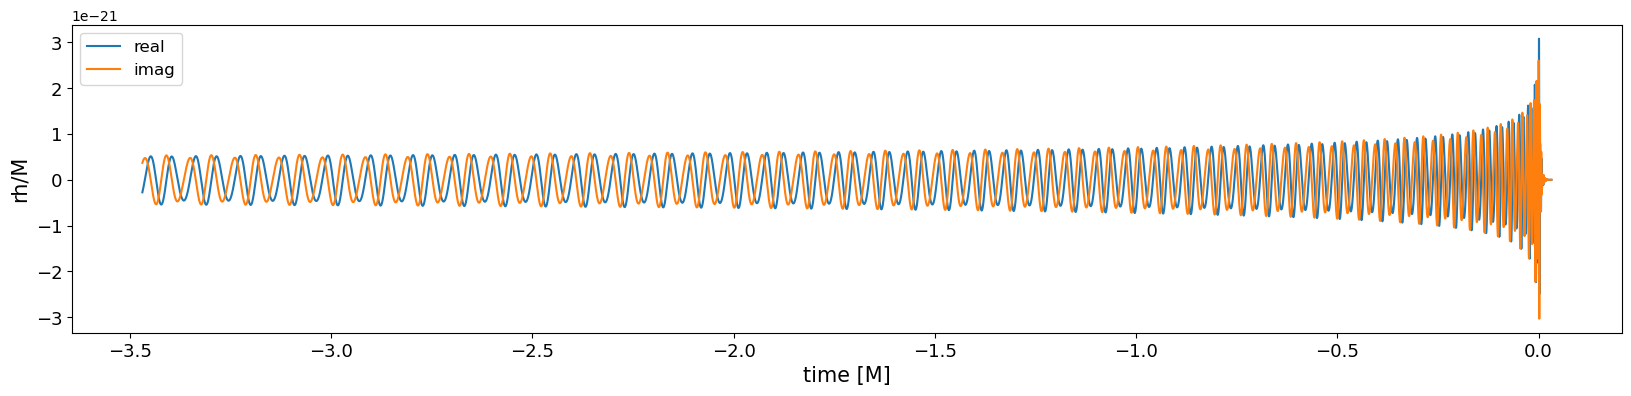

In [12]:
lmax = 3 # Note default value of lmax is 5; because we have NR calibrated modes up to l=5
tsur, hsur = bhptsur.generate_surrogate(q=8, spin1=0.7, M_tot=60, dist_mpc=100, orb_phase=np.pi/3, inclination=np.pi/4, lmax=3, mode_sum=True)


plt.figure(figsize=(20,4))
plt.plot(tsur, np.real(hsur), '-', label='real')
plt.plot(tsur, np.imag(hsur), '-', label='imag')
plt.xlabel('time [M]', fontsize=15)
plt.ylabel('rh/M', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize=12)
plt.show()

# Lesson 3: Model comparisons

Here we compare the BHPTNRSur2dq1e3 model with an [NR Surrogate model](https://link.aps.org/accepted/10.1103/PhysRevD.99.064045) called with [GWSurrogate ](https://github.com/sxs-collaboration/gwsurrogate/tree/master)

In [13]:
import gwtools as gwt
import gwsurrogate as gws
from gwtools.gwtools import minimize_norm_error_multi_mode
from gwtools.mismatch import mathcal_E_error_from_mode_dict

__name__ = gwsurrogate.new.spline_evaluation
__package__= gwsurrogate.new


In [14]:
# Load the NR surrogate model
nrsur = gws.LoadSurrogate("NRHybSur3dq8")

Loaded NRHybSur3dq8 model


In [15]:
def nr_surrogate(q=4, chiA=[0, 0.0, 0.0], chiB=[0.0, 0.0, 0.0], mode_list=None, dt=0.1, f_low=0.005, \
                 f_ref=None, time_shift=False, time_cut_begin=None, time_cut_end=None):
    # q = m1/m2 >= 1
    # dimensionless spin of the heavier BH 
    # dimensionless spin of the lighter BH
    # timestep size, Units of M
    # initial frequency in units of 1/M, f_low=0 returns the full surrogate
    # reference frequecny (1/M). The spins are assumed to specified at this frequency
    # time_shift = True : waveform starts a t=0
    # time_cut_begin applies to starting of the waveform; wrt peak time
    # time_cut_end applies end of the waveform; wrt peak time
    if f_ref==None:
        f_ref=f_low
    
    t, h, dyn = nrsur(q, chiA, chiB, dt=dt, f_low=f_low, f_ref=f_ref)   # dyn stands for dynamics, do dyn.keys() to see contents
    
    if (time_cut_begin != None) and (time_cut_end != None):
        args = np.where((t<=time_cut_end)&(t>=time_cut_begin))[0]
    elif (time_cut_begin != None) and (time_cut_end == None):
        args = np.where(t>=time_cut_begin)[0]
    elif (time_cut_begin == None) and (time_cut_end != None):
        args = np.where(t<=time_cut_end)[0]
    else:
        # All arguments
        args = np.where(t<=t[-1])[0]
    
    if time_shift:
        t = t - t[0]
        
    if mode_list==None:
        mode_list=h.keys()
    
    return t[args], {mode:h[mode][args] for mode in mode_list}

In [16]:
# Mass ratio
q = 8
# Spin 1
spin1 = -0.6
# Evaluate the BHPTNRSur2dq1e3 model without calibration
tbhpt, hbhpt = bhptsur.generate_surrogate(q=q, spin1=spin1, calibrated=True)

# Evaluate the NRHybSur3dq8 model
tnr, hnr = nr_surrogate(q=q, chiA=[0, 0.0, spin1], chiB=[0.0, 0.0, 0.0], time_cut_begin=-5000.1)

In [17]:
# Requested list of modes for calibration
mode_list = [(2, 2), (2, 1), (3, 3), (4, 4)]

hnr = {mode: hnr[mode] for mode in mode_list}
hbhpt = {mode: hbhpt[mode] for mode in mode_list}

In [18]:
# multi-modal match
[errors_before_min, errors_after_min], [tc, phic], [common_times,h_bhpt_aligned,h_nr_aligned] = \
                            minimize_norm_error_multi_mode(tbhpt, hbhpt, tnr, hnr, mode_list=None, ell_m_match=(2,2),\
                                    t_low_adj=0,t_up_adj=0,method='nelder-mead')

In [19]:
# compute error in each mode -- These are the values CalE_{IMR} shown in each figure
modelist = [(2,2),(3,3),(4,4)]
for mode in modelist:
    tmp = gwt.mismatch.mathcal_E_error_from_mode_list(h_nr_aligned[mode],h_bhpt_aligned[mode])
    print("mode (%i, %i) error = %f"%(mode[0],mode[1], tmp))

# compute error in each mode weighted by full multi-modal norm (Eq 21; https://arxiv.org/pdf/1701.00550.pdf)
# This shows that an error of 0.026 in the (4,4) mode (see above) is alternatively understood as an 
# error of 4e-5 then we consider the full waveform in the time-domain. 
relative_mode_errors = gwt.mismatch.mathcal_E_mode_contributions_from_mode_dict(h_nr_aligned,h_bhpt_aligned)
print(relative_mode_errors)

mode (2, 2) error = 0.003908
mode (3, 3) error = 0.009486
mode (4, 4) error = 0.019619
{(2, 2): 0.0037062970284253, (2, 1): 0.0010863381579015777, (3, 3): 0.00030109511227887053, (4, 4): 5.0259576158322516e-05}


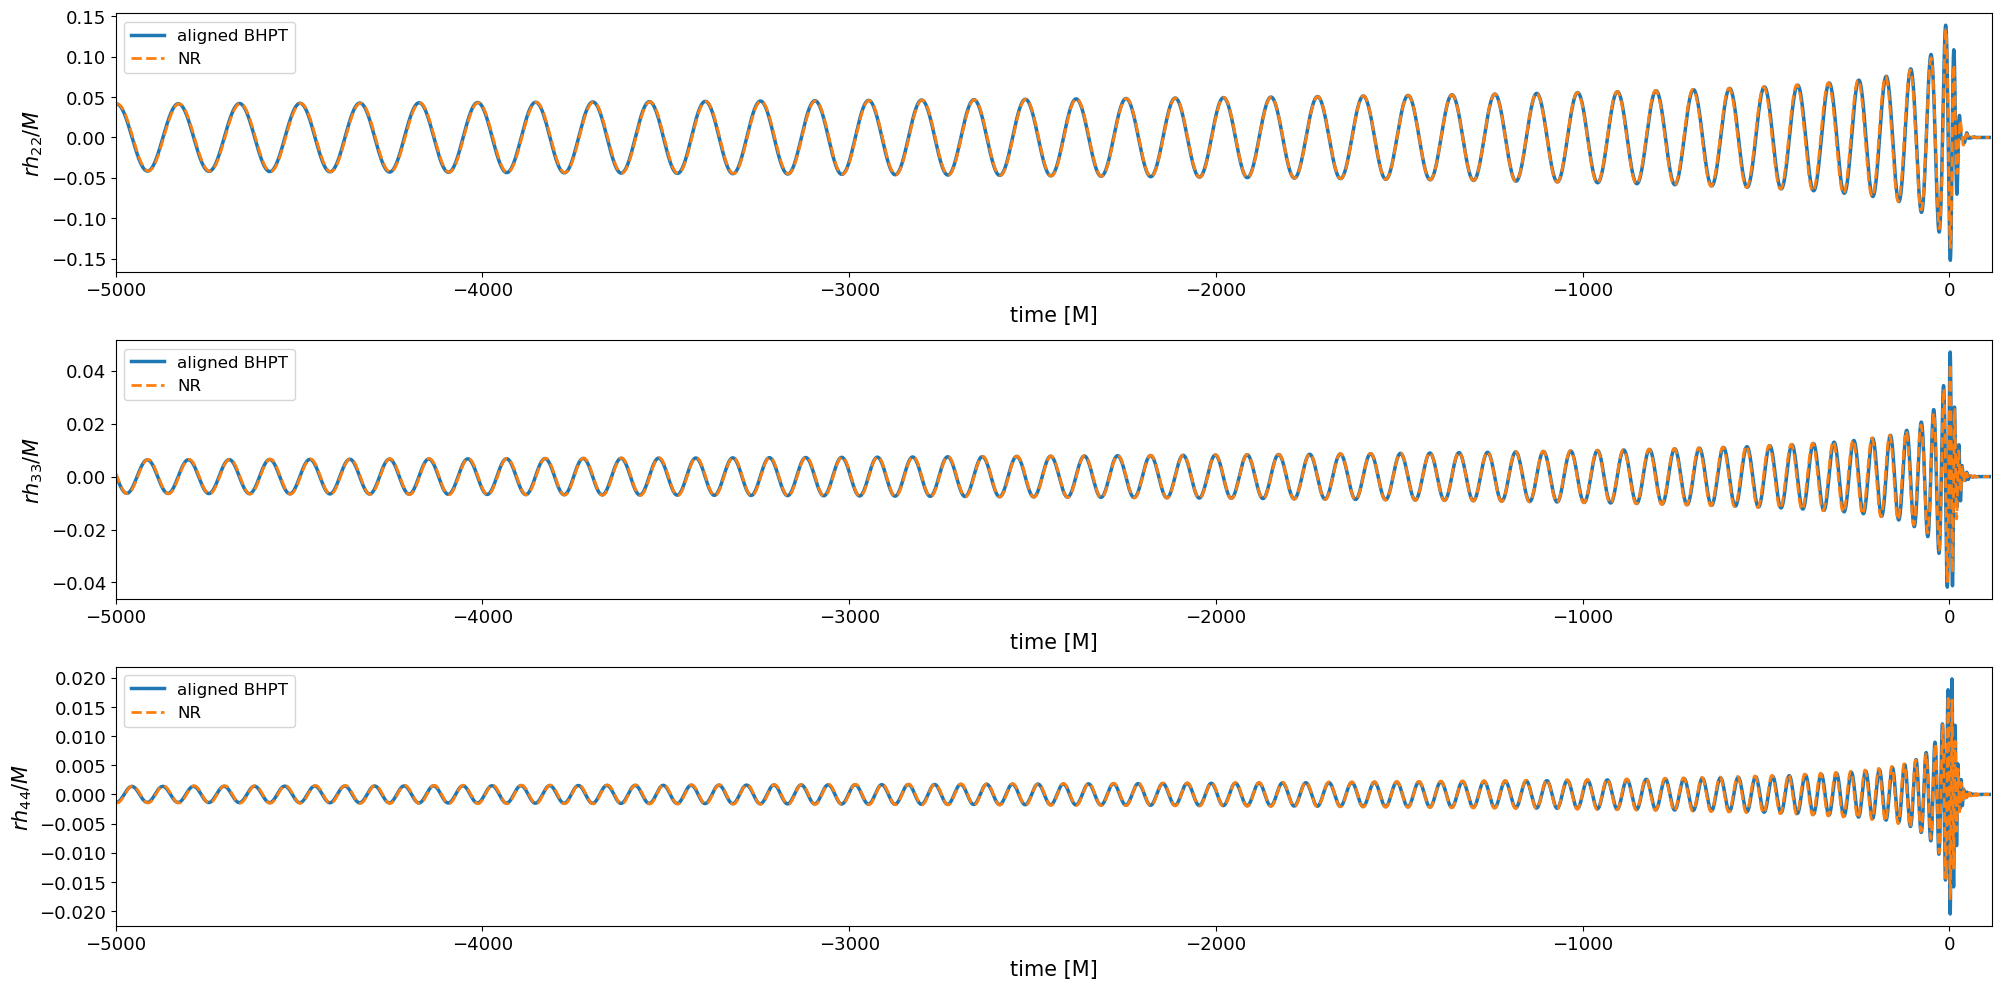

In [26]:
tstart = -5000

plt.figure(figsize=(20,10))

plt.subplot(311)
plt.plot(common_times, np.real(h_bhpt_aligned[(2,2)]), '-', lw=2.5, label='aligned BHPT')
plt.plot(common_times, np.real(h_nr_aligned[(2,2)]), '--', lw=2.0, label='NR')
plt.xlim(tstart,115)
plt.xlabel('time [M]', fontsize=15)
plt.ylabel(r'$rh_{22}/M$', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize=12)

plt.subplot(312)
plt.plot(common_times, np.real(h_bhpt_aligned[(3,3)]), '-', lw=2.5, label='aligned BHPT')
plt.plot(common_times, np.real(h_nr_aligned[(3,3)]), '--', lw=2.0, label='NR')
plt.xlim(tstart,115)
plt.xlabel('time [M]', fontsize=15)
plt.ylabel(r'$rh_{33}/M$', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize=12)

plt.subplot(313)
plt.plot(common_times, np.real(h_bhpt_aligned[(4,4)]), '-', lw=2.5, label='aligned BHPT')
plt.plot(common_times, np.real(h_nr_aligned[(4,4)]), '--', lw=2.0, label='NR')
plt.xlim(tstart,115)
plt.xlabel('time [M]', fontsize=15)
plt.ylabel(r'$rh_{44}/M$', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()

# Lesson 4: Reproducing results from the paper

Here we reproduce a few results from the arXiv paper

### 1. Inspect the BHPTNRSur2dq1e4 model-calibration parameters

By default, the BHPTNRSurrogate package will return rescaled waveform modes,
$$
\begin{align}
h^{\ell,m}_{\tt S, \alpha,\beta}(t ; q)= {\alpha_{\ell}} h^{\ell,m}_{\tt S}\left( t \beta;q \right) \,,
\end{align}
$$
where the calibration parameters, $\alpha_{\ell}(q, \chi_1)$ and $\beta(q, \chi_1)$, are tuned to NR simulations.

Lets first check that the values provided with the BHPTNRSurrogate package match the tables in the paper

In [27]:
import pprint

# Data structure layout is [A1, A2, A3, A4, B1, B2], which can be seen by 
# inspecting the input ordering of bhptsur.nrcalib.alpha_beta_BHPTNRSur2dq1e3()
pprint.pprint(bhptsur.alpha_coeffs)
print(bhptsur.beta_coeffs)

{(2, 2): array([-1.15397324,  1.48758115, -3.35617643,  4.36611547, -0.01502512,
       -0.0665036 ]),
 (3, 3): array([-2.70721357,  3.45771825, -4.26626015,  5.48741687,  0.        ,
        0.        ]),
 (4, 4): array([ -3.22349039,   2.97668803,   5.98484158, -13.090528  ,
         0.        ,   0.        ])}
[-1.21099811  1.31265337 -0.8174404  -0.07336478 -0.02433145  0.00328884]
